In [1]:
import json
import pandas as pd
from src.config import MODELS_DIR

In [2]:
def create_dfs(model_folders):
    """Parse model readings JSON into pad values."""
    models = [str(folder).split("_")[0] for folder in model_folders]
    models[1] = "deep_bnn"

    cls_reports = []
    for folder in model_folders:
        filepath = MODELS_DIR / f"ucickd/{folder}/eval/test_classification_report.json"
        with open(filepath, "r", encoding="utf-8") as f:
            data = json.load(f)
        cls_reports.append(data)

    rows = []
    for model_name, report in zip(models, cls_reports):
        for cls, metrics in report.items():
            if isinstance(metrics, dict):
                rows.append({
                    "model": model_name,
                    "class": cls,
                    "precision": metrics["precision"],
                    "recall": metrics["recall"],
                    "f1-score": metrics["f1-score"]
                })

    df = pd.DataFrame(rows)

    rows = []
    for model_name, report in zip(models, cls_reports):
        rows.append({
            "model": model_name,
            "accuracy": report["accuracy"]
        })

    adf = pd.DataFrame(rows)

    return df, adf

In [3]:
model_folders = [
    "bnn_20260102_061434",
    "deep_bnn_20260102_161055",
    "knn_20260102_091041",
    "logreg_20260102_090332",
    "nb_20260102_090048",
    "xgb_20260102_063027"
    ]

df, acc_df = create_dfs(model_folders)

## Plots

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

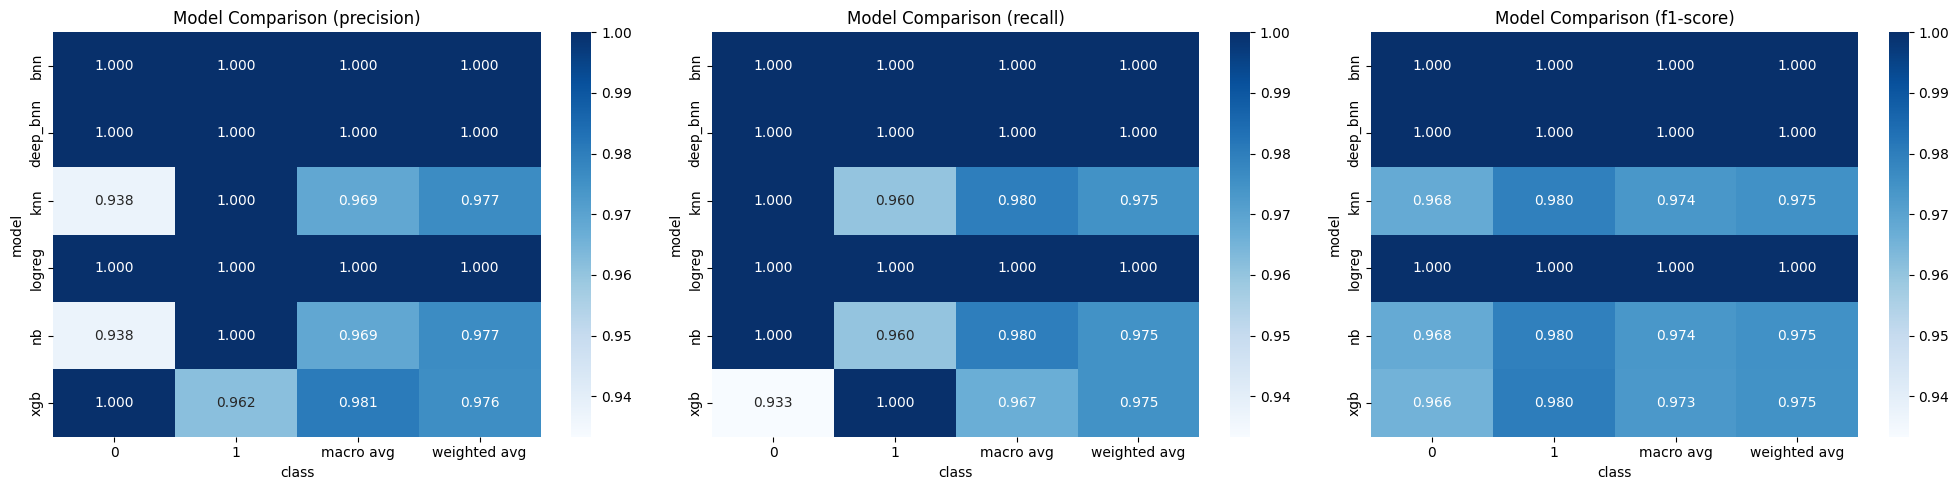

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

metrics = ["precision", "recall", "f1-score"]
vmin = df[metrics].min().min()
vmax = df[metrics].max().max()


fig, axes = plt.subplots(
    nrows=1, ncols=3,
    figsize=(20, 5),
    sharex=True
)

for ax, metric in zip(axes, metrics):
    pivot = df.pivot(index="model", columns="class", values=metric)
    sns.heatmap(pivot, annot=True, cmap="Blues", fmt=".3f", ax=ax, vmin=vmin, vmax=vmax)
    ax.set_title(f"Model Comparison ({metric})")

plt.tight_layout()
plt.show()


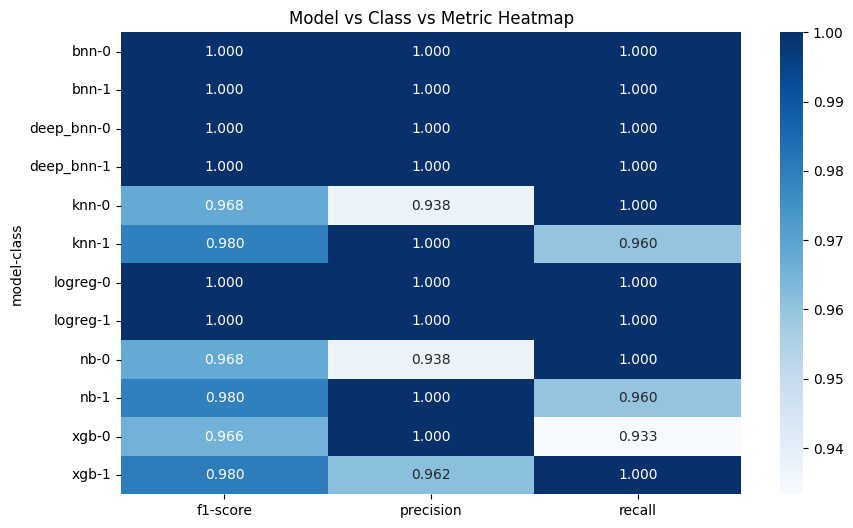

In [6]:
pivot = df[(df["class"]=="0") | (df["class"]=="1")].pivot_table(
    index=["model", "class"],
    values=["precision", "recall", "f1-score"]
)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, cmap="Blues", fmt=".3f")
plt.title("Model vs Class vs Metric Heatmap")
plt.show()


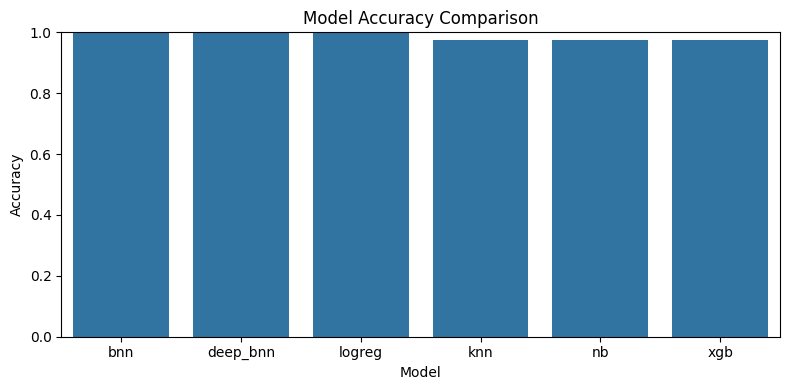

In [7]:
acc_sorted = acc_df.sort_values("accuracy", ascending=False)

plt.figure(figsize=(8, 4))
sns.barplot(data=acc_sorted, x="model", y="accuracy")

plt.title("Model Accuracy Comparison")
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.xlabel("Model")

plt.tight_layout()
plt.show()